In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [2]:
file_path = 'me.JPG'

In [3]:
read_methods = [cv2.IMREAD_ANYCOLOR,
               cv2.IMREAD_ANYDEPTH,
               cv2.IMREAD_COLOR,
               cv2.IMREAD_GRAYSCALE,
               cv2.IMREAD_IGNORE_ORIENTATION,
               cv2.IMREAD_LOAD_GDAL,
               cv2.IMREAD_REDUCED_COLOR_2,
               cv2.IMREAD_REDUCED_COLOR_4,
               cv2.IMREAD_REDUCED_COLOR_8,
               cv2.IMREAD_REDUCED_GRAYSCALE_2,
               cv2.IMREAD_REDUCED_GRAYSCALE_4,
               cv2.IMREAD_REDUCED_GRAYSCALE_8,
               cv2.IMREAD_UNCHANGED]

In [4]:
read_images = list()
for i in read_methods:
    read_images.append(cv2.imread(file_path,i))

(500, 750, 3)
(500, 750)
(500, 750, 3)
(500, 750)
(500, 750)
(500, 750, 3)
(250, 375, 3)
(125, 188, 3)
(63, 94, 3)
(250, 375)
(125, 188)
(63, 94)
(500, 750, 3)


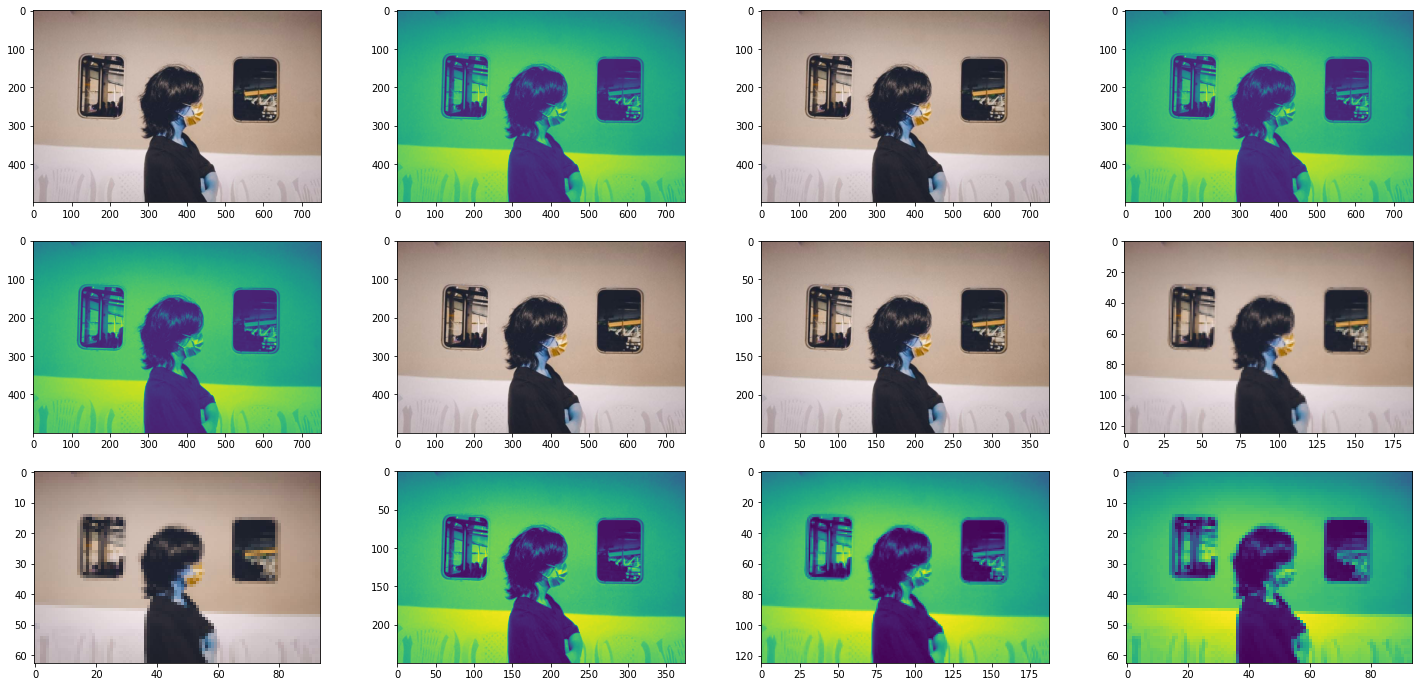

In [5]:
fig, axes = plt.subplots(nrows=3,ncols=4, figsize=(25, 12))
#fig.tight_layout()

for i in range(4):
    axes[0][i].imshow(read_images[i])
    axes[1][i].imshow(read_images[i+4])
    axes[2][i].imshow(read_images[i+8])

for j in read_images:
    print(j.shape)

methods                | pixel and channels 
-------                |         -------
cv2.IMREAD_ANYCOLOR            | (500, 750, 3)
cv2.IMREAD_ANYDEPTH            | (500, 750)   
cv2.IMREAD_COLOR               | (500, 750, 3) 
cv2.IMREAD_GRAYSCALE           | (500, 750)   
cv2.IMREAD_IGNORE_ORIENTATION  | (500, 750)   
cv2.IMREAD_LOAD_GDAL           | (500, 750, 3)
cv2.IMREAD_REDUCED_COLOR_2     | (250, 375, 3)
cv2.IMREAD_REDUCED_COLOR_4     | (125, 188, 3)
cv2.IMREAD_REDUCED_COLOR_8     | (63, 94, 3)  
cv2.IMREAD_REDUCED_GRAYSCALE_2 | (250, 375)   
cv2.IMREAD_REDUCED_GRAYSCALE_4 | (125, 188)   
cv2.IMREAD_REDUCED_GRAYSCALE_8 | (63, 94)     
cv2.IMREAD_UNCHANGED           | (500, 750, 3)

What if I want to know every element of any array is same ? 

In [6]:
print((read_images[0] == read_images[2]).all())

True


In [7]:
same_pixel_ones = [read_images[0],read_images[2], read_images[5], read_images[12]]

In [8]:
print((same_pixel_ones[0] == same_pixel_ones[1]).all())
print((same_pixel_ones[1] == same_pixel_ones[2]).all())
print((same_pixel_ones[2] == same_pixel_ones[3]).all())

True
True
True


In [9]:
gray_same_px_ones = [read_images[1], read_images[3], read_images[4]]

In [10]:
print((gray_same_px_ones[0]==gray_same_px_ones[1]).all())
print((gray_same_px_ones[1]==gray_same_px_ones[2]).all())

True
True


[In OpenCV (Python), why am I getting 3 channel images from a grayscale image?](https://stackoverflow.com/a/18871394/10582082)

(500, 750)


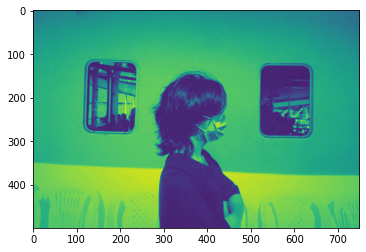

In [11]:
# imageGrayMode = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(read_images[3])
print(read_images[3].shape)

(500, 750, 3)


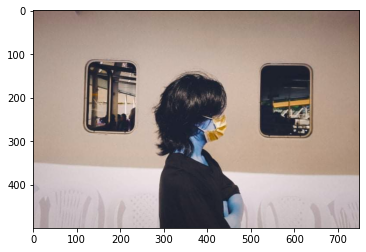

In [12]:
# imageColorMode = cv2.imread(file_path, cv2.IMREAD_COLOR)
plt.imshow(read_images[2])
print(read_images[2].shape)

In [13]:
# plt.imshow(cv2.cvtColor(imageColorMode, cv2.COLOR_BGR2RGB))

__cv2.CV_LOAD_IMAGE_GRAYSCALE vs cv2.IMREAD_GRAYSCALE__
---

cv2.CV_LOAD_IMAGE_GRAYSCALE was deprecated!

### cv2.IMREAD_GRAYSCALE __vs__ cv2.imread then cvtColor to grayscale with 
`cv2.COLOR_BGR2GRAY`

In [14]:
def load(img_path_color):
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 5))
    fig.tight_layout()
    time_1 = time()
    img_read_as_gray = cv2.imread(img_path_color, cv2.IMREAD_GRAYSCALE)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[0].imshow(img_read_as_gray)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('as_gray.jpg', img_read_as_gray)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))
    print("")
    time_1 = time()
    img_read_as_color = cv2.cvtColor(cv2.imread(img_path_color),cv2.COLOR_BGR2GRAY)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[1].imshow(img_read_as_color)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('as_color.jpg', img_read_as_color)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))

read time:  0.04327249526977539
write time:  0.012740850448608398
disk write time:  0.05700254440307617
total time:  0.1135568618774414

read time:  0.08884549140930176
write time:  0.012787103652954102
disk write time:  0.055518388748168945
total time:  0.1574094295501709


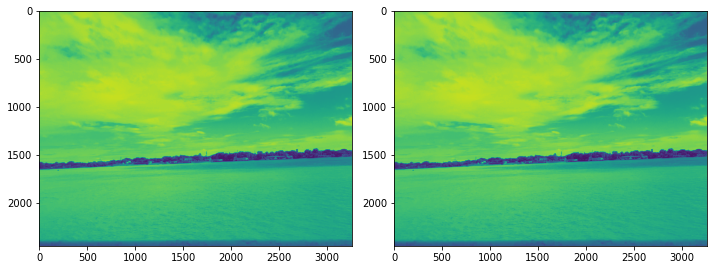

In [15]:
load('two_port.JPG')

read image context
---

In [16]:
def load_pixel(img_path_color):
    fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15, 5))
    fig.tight_layout()

    time_1 = time()
    img_read_as_gray = cv2.imread(img_path_color, cv2.IMREAD_GRAYSCALE)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[0].imshow(img_read_as_gray)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('gray.jpg', img_read_as_gray)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))
    
    time_1 = time()
    img_read_as_gray_2 = cv2.imread(img_path_color, cv2.IMREAD_REDUCED_GRAYSCALE_2)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[1].imshow(img_read_as_gray_2)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('gray_2.jpg', img_read_as_gray_2)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))
    
    time_1 = time()
    img_read_as_gray_4 = cv2.imread(img_path_color, cv2.IMREAD_REDUCED_GRAYSCALE_4)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[2].imshow(img_read_as_gray_4)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('gray_4.jpg', img_read_as_gray_4)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))

read time:  0.0022132396697998047
write time:  0.0014393329620361328
disk write time:  0.0031173229217529297
total time:  0.007169961929321289
read time:  0.0015914440155029297
write time:  0.0008711814880371094
disk write time:  0.001203775405883789
total time:  0.003793001174926758
read time:  0.0013794898986816406
write time:  0.0006573200225830078
disk write time:  0.0003695487976074219
total time:  0.0025146007537841797


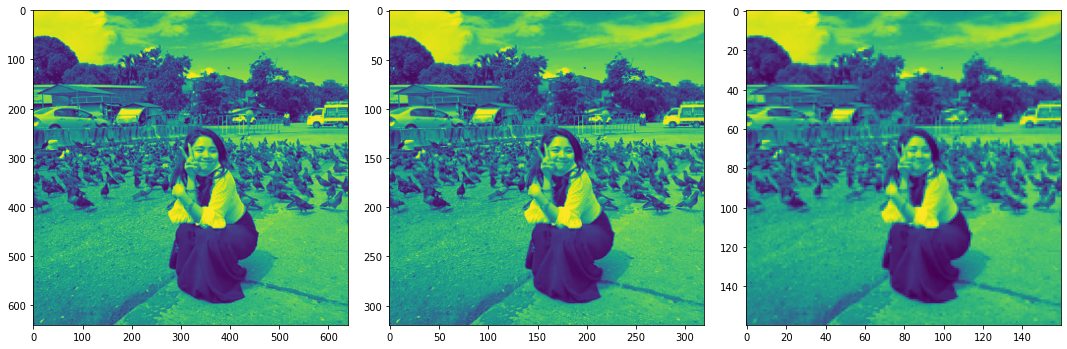

In [17]:
load_pixel('my_girl.JPG')

...

In [18]:
images = list()
manipulations = {'color':cv2.IMREAD_COLOR,
                'gray':cv2.IMREAD_GRAYSCALE,
                'cvt_color_rgb':cv2.COLOR_BGR2RGB}

image = cv2.imread(file_path)
images.append(image)
read_img_gray_mode = cv2.imread(file_path, manipulations['gray'])
images.append(read_img_gray_mode)
read_img_color_mode = cv2.imread(file_path, manipulations['color'])
images.append(read_img_color_mode)
gray_img_rgb = cv2.cvtColor(read_img_gray_mode, manipulations['cvt_color_rgb'])
images.append(gray_img_rgb)
color_img_rgb = cv2.cvtColor(read_img_color_mode, manipulations['cvt_color_rgb'])
images.append(color_img_rgb)

In [19]:
len(images)

5

Text(0.5, 1.0, 'read as color and cvt rgb')

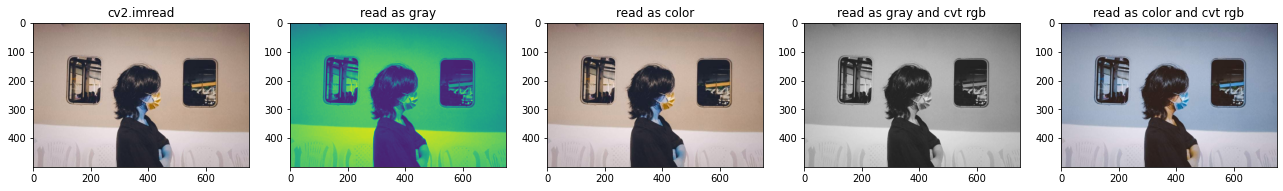

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=len(images), figsize=(18, 5))
fig.tight_layout()
j = 0
for i in images:
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('cv2.imread')
axes[1].set_title('read as gray')
axes[2].set_title('read as color')
axes[3].set_title('read as gray and cvt rgb')
axes[4].set_title('read as color and cvt rgb')

#### nothing to be splited from gray scale image as it has only one channel.

example below figure

(500, 750)


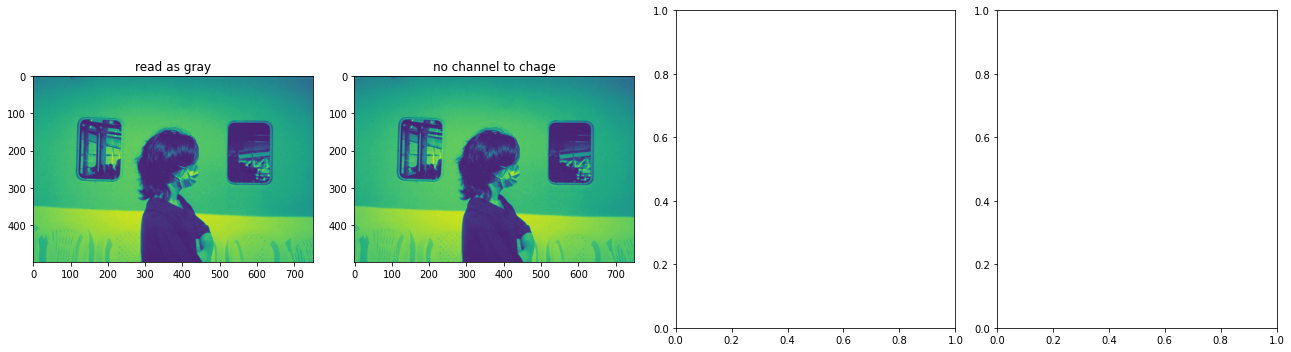

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(images[1])
j = 1
for i in cv2.split(images[1]):
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('read as gray')
axes[1].set_title('no channel to chage')
print(images[1].shape)

Can i split 3 channels from an image ?

(500, 750, 3)


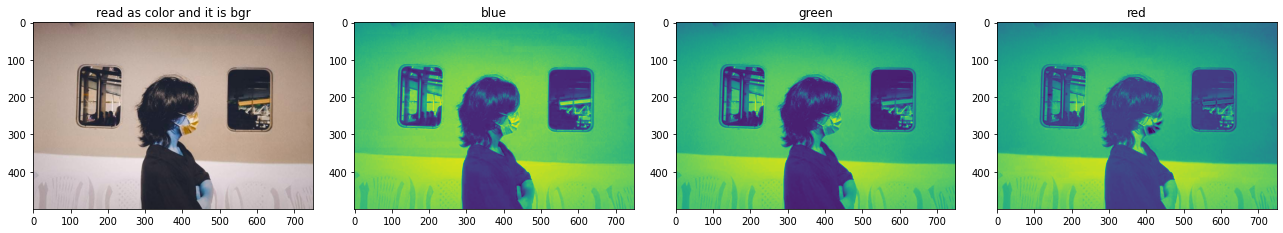

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(images[2])
j = 1
for i in cv2.split(images[2]):
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('read as color and it is bgr')
axes[1].set_title('blue')
axes[2].set_title('green')
axes[3].set_title('red')
print(images[2].shape)

*Can i plit 3 channels from a gray scaled image which has converted to `BGR2GRAY`

As you can see an image which is gray scaled but it has 3 channels, interesting one huh? 

(500, 750, 3)


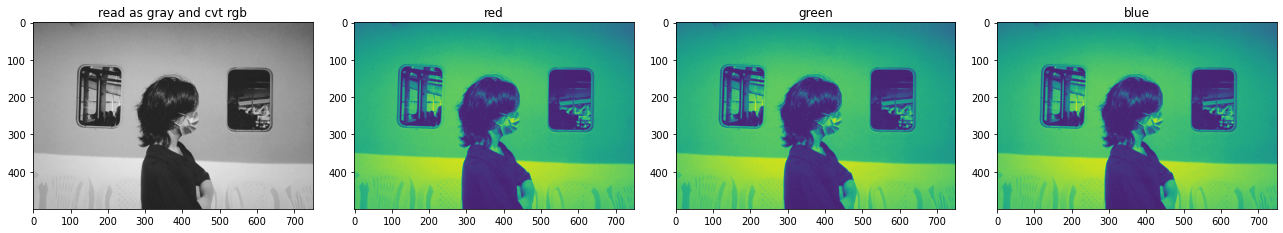

In [23]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(images[3])
j = 1
for i in cv2.split(images[3]):
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('read as gray and cvt rgb')
axes[1].set_title('red')
axes[2].set_title('green')
axes[3].set_title('blue')
print(images[3].shape)

In [27]:
# I think each of red green blue channel from converted gray scale image, may has same value, let's find out!
gray_red_channel , gray_green_channel, gray_blue = cv2.split(images[3])
print((gray_red_channel == gray_green_channel).all())
print((gray_blue == gray_green_channel).all())

True
True


oh sheet it is same!!!

### what if I can stack these channels into one ? interesante.............

(500, 750, 3)


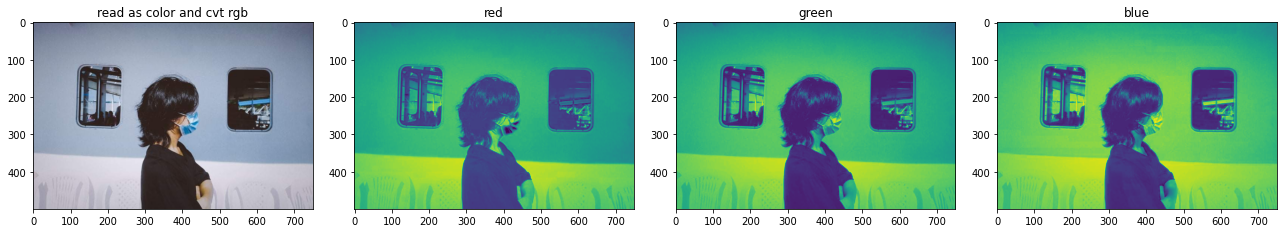

In [28]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(images[4])
j = 1
for i in cv2.split(images[4]):
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('read as color and cvt rgb')
axes[1].set_title('red')
axes[2].set_title('green')
axes[3].set_title('blue')
print(images[4].shape)

## BGR & RGB

(500, 750, 3)


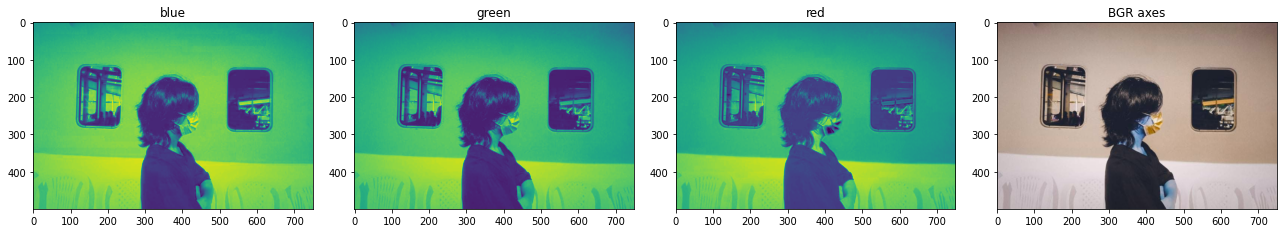

In [29]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[3].imshow(images[2])
j = 0
for i in cv2.split(images[2]):
    axes[j].imshow(i)
    j+=1

axes[0].set_title('blue')
axes[1].set_title('green')
axes[2].set_title('red')
axes[3].set_title('BGR axes')
print(images[2].shape)

(500, 750, 3)


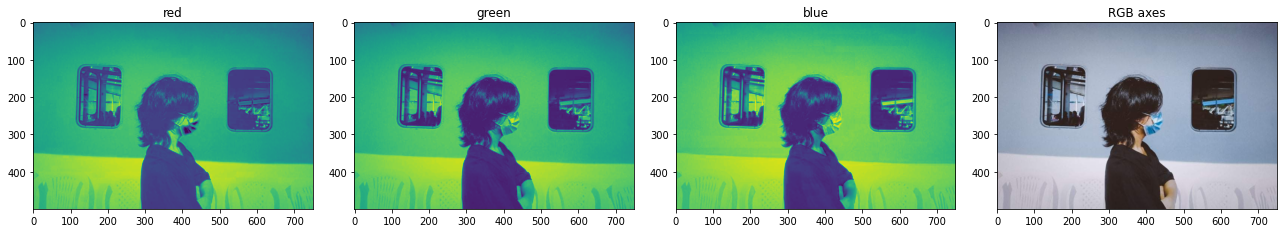

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[3].imshow(images[4])
j = 0
for i in cv2.split(images[4]):
    axes[j].imshow(i)
    j+=1

axes[0].set_title('red')
axes[1].set_title('green')
axes[2].set_title('blue')
axes[3].set_title('RGB axes')
print(images[2].shape)

### What if I want to work with dirty stuff in context ? i mean without using opencv's `split` function

In [31]:
b = images[2][:,:,0]
g = images[2][:,:,1]
r = images[2][:,:,2]

(500, 750, 3)


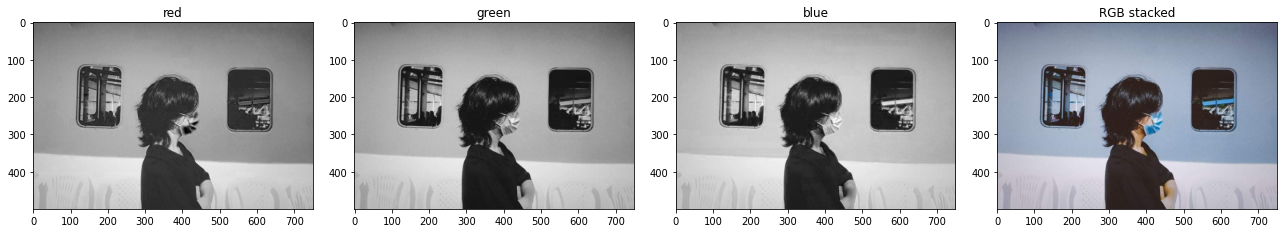

In [37]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()

rgb_stack = np.dstack((r,g,b))
plt.imshow(rgb_stack)


axes[3].imshow(rgb_stack)
axes[3].set_title('RGB stacked')

axes[2].imshow(b, cmap='gray')
axes[2].set_title('blue')
axes[1].imshow(g, cmap='gray')
axes[1].set_title('green')
axes[0].imshow(r, cmap='gray')
axes[0].set_title('red')

print(images[2].shape)

# m' interesting in gray images
so..

In [38]:
gray_ones = list()
gray_ones.append(images[1])
gray_ones.append(images[3])

In [39]:
gray_ones[0].shape

(500, 750)

In [40]:
gray_ones[1].shape

(500, 750, 3)

Text(0.5, 1.0, '(500, 750, 3)')

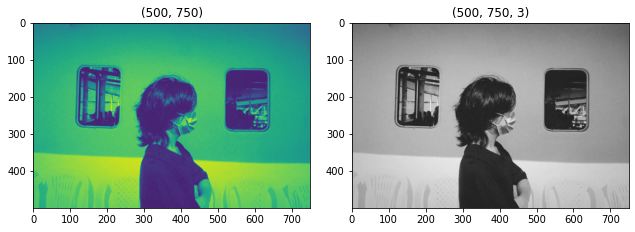

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(9, 3.5))
fig.tight_layout()
axes[0].imshow(gray_ones[0])
axes[0].set_title(gray_ones[0].shape)

axes[1].imshow(gray_ones[1])
axes[1].set_title(gray_ones[1].shape)

as you can see left image, it has only one channel and seem to be insaned but it has been said as gray not gay!

right one is three channel and we can see it is a gray scaled, 

actually I have converted left one to right one by `cv2.cvtColor`

so question is, why there was seen to be created any other two channels when I converted one channel insane gray scaled image to the right one?

interesting... let's split the right one out as it has 3 channels

In [42]:
cv_r, cv_g, cv_b = cv2.split(gray_ones[1]) # because I have applied cvtColor to RGB on gray image,so the gray image will be sorted as R G B.

Text(0.5, 1.0, 'blue')

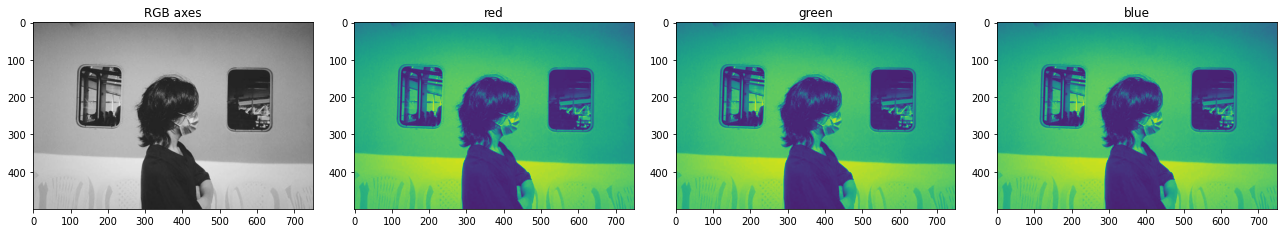

In [43]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(gray_ones[1])
axes[0].set_title('RGB axes')

axes[1].imshow(cv_r)
axes[1].set_title('red')
axes[2].imshow(cv_g)
axes[2].set_title('green')
axes[3].imshow(cv_b)
axes[3].set_title('blue')

In [44]:
insane_ones = np.zeros((500,750,3), 'uint8')
insane_ones[...,0] = gray_ones[0]
insane_ones[...,1] = gray_ones[0]
insane_ones[...,2] = gray_ones[0]

Text(0.5, 1.0, 'unknown')

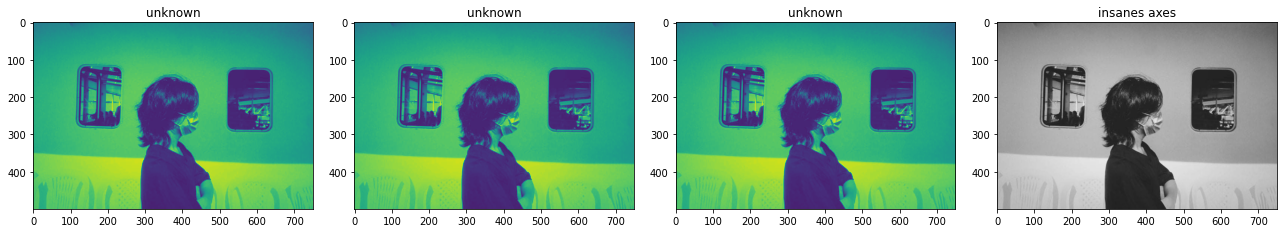

In [45]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[3].imshow(insane_ones)
axes[3].set_title('insanes axes')

axes[0].imshow(gray_ones[0])
axes[0].set_title('unknown')
axes[1].imshow(gray_ones[0])
axes[1].set_title('unknown')
axes[2].imshow(gray_ones[0])
axes[2].set_title('unknown')

## what is unit8 ?

In [46]:
np.amax(gray_ones[1])

248

In [53]:
normalized = gray_ones[1].copy()

In [54]:
np.amax(normalized)

248

In [55]:
normalized = normalized/255

In [56]:
np.amax(normalized)

0.9725490196078431

In [61]:
cv2.imwrite('org_gray.jpg', gray_ones[1])

True

In [62]:
cv2.imwrite('normalized_gray.jpg', normalized)

True

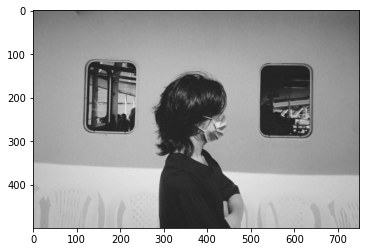

In [60]:
plt.imshow(normalized)

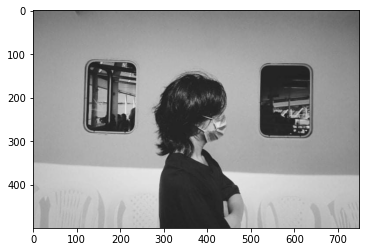

In [58]:
plt.imshow(gray_ones[1])

In [68]:
normalized_read = cv2.imread('normalized_gray.jpg')

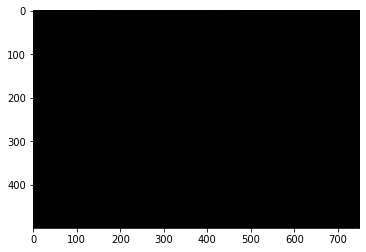

In [70]:
plt.imshow(normalized_read)

In [71]:
normalized.shape

(500, 750, 3)

In [72]:
normalized_read.shape

(500, 750, 3)

https://www.youtube.com/watch?v=WNeJua8TMWA

IDK what I am doing...
---

[normalization](https://www.researchgate.net/post/What_are_the_advantages_of_normalization_in_image_processingis_normalized_image_mean_0_and_variance_1)